Major Project Proposal: Netflix Dataset Analysis
1. Introduction to Dataset
The dataset under consideration is a Netflix dataset containing 7,789 records and 11 columns. It includes important details about Movies and TV Shows available on the platform. Key attributes include the title, director, cast, country of origin, release date, rating, duration, and type (genres). The dataset spans multiple years, with entries ranging from 2008 to 2021, covering content across diverse countries and genres.
2. Problem Statement
Netflix has become one of the most prominent global streaming platforms, continuously expanding its library with a mix of original productions and licensed content. However, with growing competition from platforms like Amazon Prime, Disney+, and regional OTT providers, Netflix must strategically analyze its content catalog to identify strengths, gaps, and opportunities.
The specific problem to be addressed in this project is 'Content Trends Analysis for Strategic Recommendations'. The aim is to uncover how Netflix’s content distribution (Movies vs. TV Shows, genres, and country contributions) has evolved over the years. This will enable the identification of key genres, audience preferences, and strategic insights into global content expansion.
3. Importance of the Problem Statement
Understanding Netflix’s content trends is crucial for making data-driven business decisions. The analysis not only highlights the balance between Movies and TV Shows but also reveals popular genres and underrepresented categories. For a platform that serves diverse international audiences, country-wise contributions provide valuable insights into global representation and market penetration.
By focusing on these content trends, Netflix can refine its strategy for content acquisition and production, ensuring that it caters to the right audience segments while staying competitive in the global OTT industry.
4. Objectives
- Analyze the distribution of Movies vs. TV Shows over the years.
- Identify the most common genres and how their popularity has changed.
- Compare country-wise contributions to Netflix’s catalog.
5. Expected Outcomes
- A clear understanding of how Netflix’s content strategy has evolved.
- Identification of top-performing genres and categories.
- Strategic recommendations on which content types Netflix should focus on in the future.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
# Read the Netflix Data
df = pd.read_csv("/content/Netflix Dataset.csv")

Access The DATA

In [ ]:
df.head()

Show_Id Category  Title           Director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie  07:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                Cast        Country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

        Release_Date Rating   Duration  \
0    August 14, 2020  TV-MA  4 Seasons   
1  December 23, 2016  TV-MA     93 min   
2  December 20, 2018      R     78 min   
3  November 16, 2017  PG-13     80 min   
4    January 1, 2020  PG-13    123 min   

                                                Type  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         Description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [ ]:
df.duplicated().value_counts()

False    7787
True        2
Name: count, dtype: int64

In [ ]:
df['Type'] = df['Type'].fillna('Unknown')
df['Release_Date'] = df['Release_Date'].fillna('Unknown')

In [ ]:
# Strip leading/trailing spaces
df['Release_Date'] = df['Release_Date'].astype(str).str.strip()

In [ ]:
# Convert to datetime, invalid parsing will become NaT
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

In [ ]:
# Check number of invalid dates
invalid_dates = df[df['Release_Date'].isna()]
print(f"Number of invalid Release_Date entries: {len(invalid_dates)}")


Number of invalid Release_Date entries: 10


#Correct Typos / Standardize Values

In [ ]:
# Correct typos
df.loc[df['Type'].str.lower() == 'movi', 'Type'] = 'Movie'
df.loc[df['Type'].str.lower() == 'tv show', 'Type'] = 'TV Show'

In [ ]:
#  Country column
print("\nSample countries before correction:")
print(df['Country'].unique()[:20])


Sample countries before correction:
['Brazil' 'Mexico' 'Singapore' 'United States' 'Turkey' 'Egypt' 'India'
 'Poland, United States' 'Thailand' 'Nigeria' nan
 'Norway, Iceland, United States' 'United Kingdom' 'Japan' 'South Korea'
 'Italy' 'Canada' 'Indonesia' 'Romania' 'Spain']


In [ ]:
# Correct common typos
df.loc[df['Country'] == 'Untied States', 'Country'] = 'United States'
df.loc[df['Country'] == 'Uk', 'Country'] = 'United Kingdom'
df.loc[df['Country'] == 'South korea', 'Country'] = 'South Korea'

In [ ]:
# Standardize genres / categories
# Remove extra spaces and capitalize each genre
df['Category'] = df['Category'].apply(
    lambda x: ', '.join([genre.strip().title() for genre in x.split(',')])
)

In [ ]:
print("\nSample after cleaning:")
print(df.head())

print("\nUnique 'Type' values after correction:")
print(df['Type'].unique())

print("\nUnique 'Country' values after correction:")
print(df['Country'].unique()[:20])


Sample after cleaning:
  Show_Id Category  Title           Director  \
0      s1  Tv Show     3%                NaN   
1      s2    Movie  07:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                Cast        Country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  Release_Date Rating   Duration  \
0   2020-08-14  TV-MA  4 Seasons   
1   2016-12-23  TV-MA     93 min   
2   2018-12-20      R     78 min   
3   2017-11-16  PG-13     80 min   
4   2020-01-01  PG-13    123 min   

                                           

In [ ]:
#Check for duplicates

duplicates_count = df.duplicated().value_counts()
print("Duplicate check (True = duplicate, False = unique):")
print(duplicates_count)

#Display sample duplicate rows
duplicate_rows = df[df.duplicated()]
print("\nSample duplicate rows (first 10):")
print(duplicate_rows.head(10))

#Remove duplicates
df = df.drop_duplicates()
print("\nShape after removing duplicates:", df.shape)


Duplicate check (True = duplicate, False = unique):
False    7787
True        2
Name: count, dtype: int64

Sample duplicate rows (first 10):
     Show_Id Category              Title        Director  \
6300    s684    Movie           Backfire     Dave Patten   
6622   s6621    Movie  The Lost Okoroshi  Abba T. Makama   

                                                   Cast        Country  \
6300  Black Deniro, Byron "Squally" Vinson, Dominic ...  United States   
6622  Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...        Nigeria   

     Release_Date Rating Duration                                   Type  \
6300   2019-04-05  TV-MA   97 min  Dramas, Independent Movies, Thrillers   
6622   2020-09-04  TV-MA   94 min   Comedies, Dramas, Independent Movies   

                                            Description  
6300  When two would-be robbers accidentally kill a ...  
6622  A disillusioned security guard transforms into...  

Shape after removing duplicates: (7787, 11)


In [ ]:
df.duplicated().value_counts()

False    7787
Name: count, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7787 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Show_Id       7787 non-null   object        
 1   Category      7787 non-null   object        
 2   Title         7787 non-null   object        
 3   Director      5399 non-null   object        
 4   Cast          7069 non-null   object        
 5   Country       7787 non-null   object        
 6   Release_Date  7777 non-null   datetime64[ns]
 7   Rating        7780 non-null   object        
 8   Duration      7787 non-null   object        
 9   Type          7787 non-null   object        
 10  Description   7787 non-null   object        
dtypes: datetime64[ns](1), object(10)
memory usage: 730.0+ KB


EXPLORATORY DATA ANALYSIS (EDA)

Exploratory Data Analysis (EDA) is a vital phase in data analysis, involving the examination and visualization of data to uncover patterns, trends, and insights. In the context of an Airbnb data analysis project, EDA allows researchers to gain a comprehensive understanding of the dataset's characteristics, distribution, and relationships between variables. Through techniques such as summary statistics, data visualization, and correlation analysis, EDA sets the stage for further investigation and hypothesis testing, guiding subsequent analytical decisions.

In [ ]:
df.describe()

Release_Date
count                           7777
mean   2019-01-02 19:20:57.708627968
min              2008-01-01 00:00:00
25%              2018-02-01 00:00:00
50%              2019-03-08 00:00:00
75%              2020-01-20 00:00:00
max              2021-01-16 00:00:00

What are the different property types in the Dataset?



In [ ]:
type_counts = df['Type'].value_counts().to_frame()
print(type_counts)


                                                    count
Type                                                     
Documentaries                                         334
Stand-Up Comedy                                       321
Dramas, International Movies                          320
Comedies, Dramas, International Movies                243
Dramas, Independent Movies, International Movies      215
...                                                   ...
Crime TV Shows, International TV Shows, TV Sci-...      1
Docuseries, Science & Nature TV, TV Action & Ad...      1
British TV Shows, Classic & Cult TV, Kids' TV           1
Docuseries, TV Sci-Fi & Fantasy                         1
Children & Family Movies, Dramas, Music & Musicals      1

[492 rows x 1 columns]


In [ ]:
# Split genres and count each separately
genres_series = df['Category'].str.split(',').explode().str.strip().value_counts().to_frame()
print(genres_series)


          count
Category       
Movie      5377
Tv Show    2410


In [ ]:
country_counts = df['Country'].value_counts().to_frame()
print(country_counts)


                                                count
Country                                              
United States                                    2555
India                                             923
Unknown                                           507
United Kingdom                                    397
Japan                                             226
...                                               ...
Peru, United States, United Kingdom                 1
Saudi Arabia, United Arab Emirates                  1
United Kingdom, France, United States, Belgium      1
France, Norway, Lebanon, Belgium                    1
Austria, Iraq, United States                        1

[682 rows x 1 columns]


Movies vs TV Shows Bar Chart

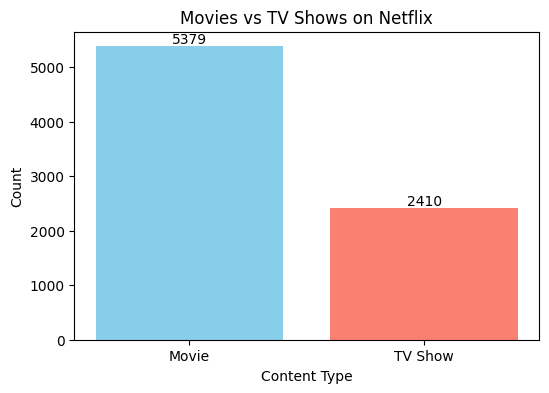

In [ ]:
import matplotlib.pyplot as plt

# Example: assuming df has a column "type" with values 'Movie' or 'TV Show'
content_counts = df['Category'].value_counts()

plt.figure(figsize=(6,4))
bars = plt.bar(content_counts.index, content_counts.values, color=['skyblue','salmon'])
plt.bar_label(bars)

plt.xlabel("Content Type")
plt.ylabel("Count")
plt.title("Movies vs TV Shows on Netflix")
plt.show()

This will give you a simple bar chart with just 2 bars (Movie, TV Show).

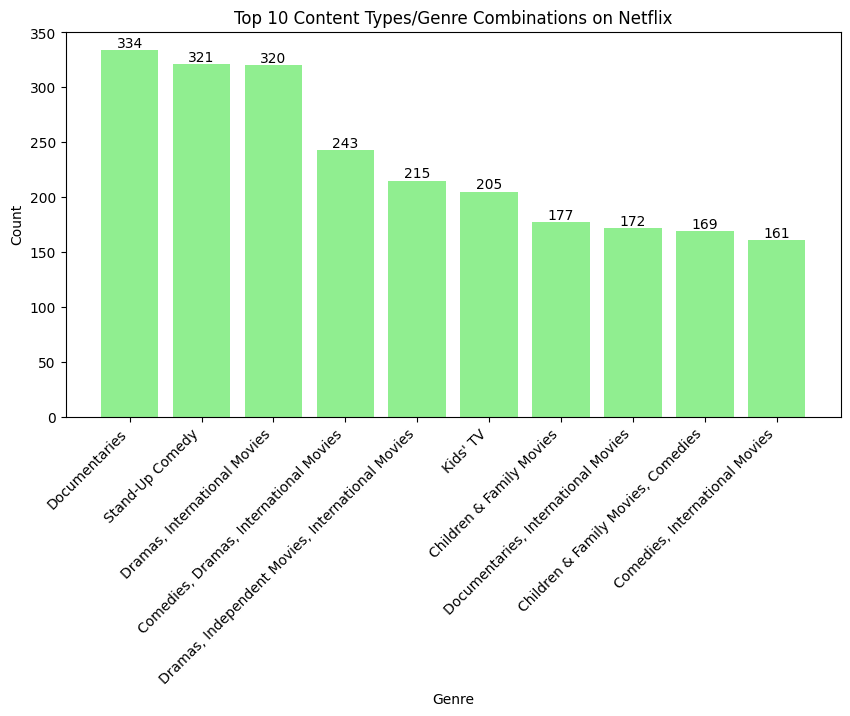

In [ ]:
top_genres = df['Type'].value_counts().head(10)

plt.figure(figsize=(10,5))
bars = plt.bar(top_genres.index, top_genres.values, color="lightgreen")
plt.bar_label(bars)

plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Top 10 Content Types/Genre Combinations on Netflix")
plt.xticks(rotation=45, ha='right')
plt.show()

Get 10 bars, readable labels, not squished.

Plot 10 Countries with Most Content

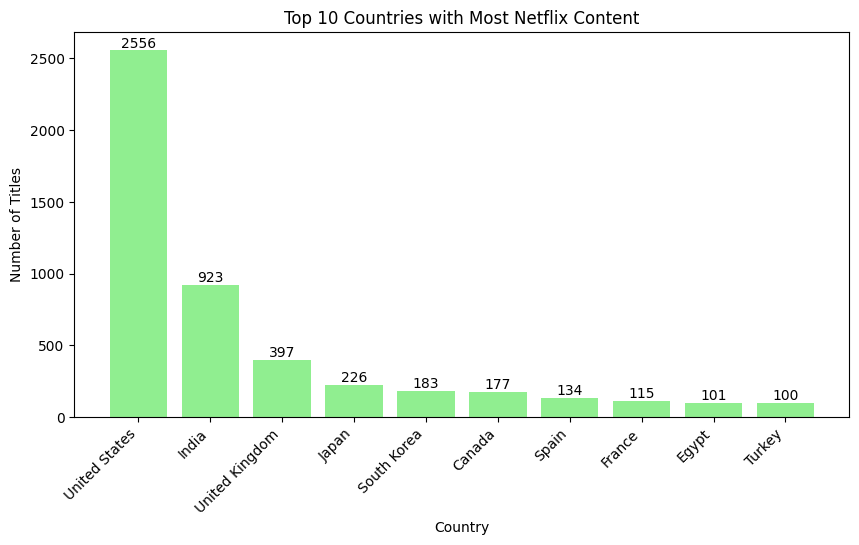

In [ ]:
top_countries = df['Country'].value_counts().head(10)

plt.figure(figsize=(10,5))
bars = plt.bar(top_countries.index, top_countries.values, color="lightgreen")
plt.bar_label(bars)

plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.title("Top 10 Countries with Most Netflix Content")
plt.xticks(rotation=45, ha="right")
plt.show()


Release Year Trend

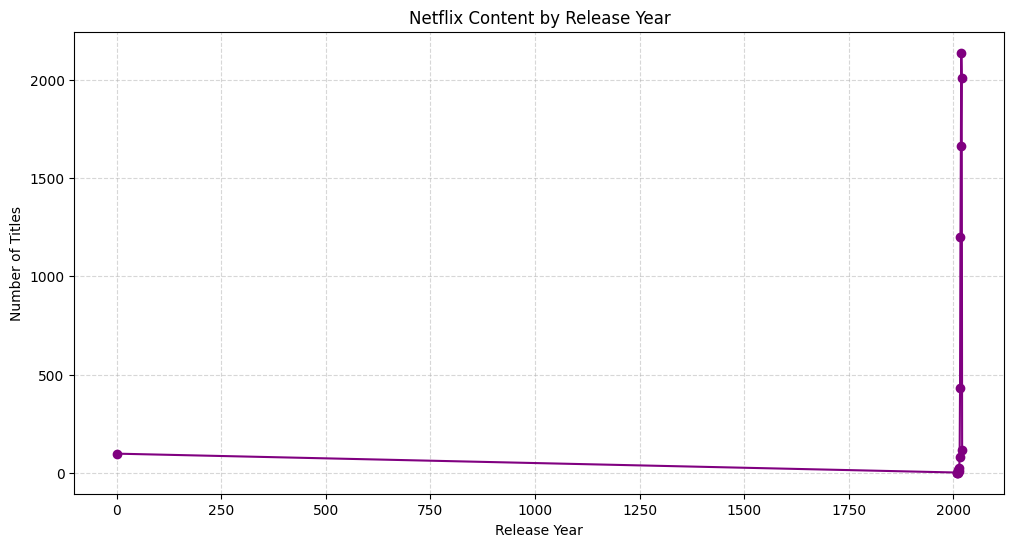

In [ ]:
# Extract the year from the Release_Date column
df['release_year'] = df['Release_Date'].dt.year.fillna(0).astype(int)

year_counts = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(12,6))
plt.plot(year_counts.index, year_counts.values, marker="o", color="purple")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.title("Netflix Content by Release Year")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

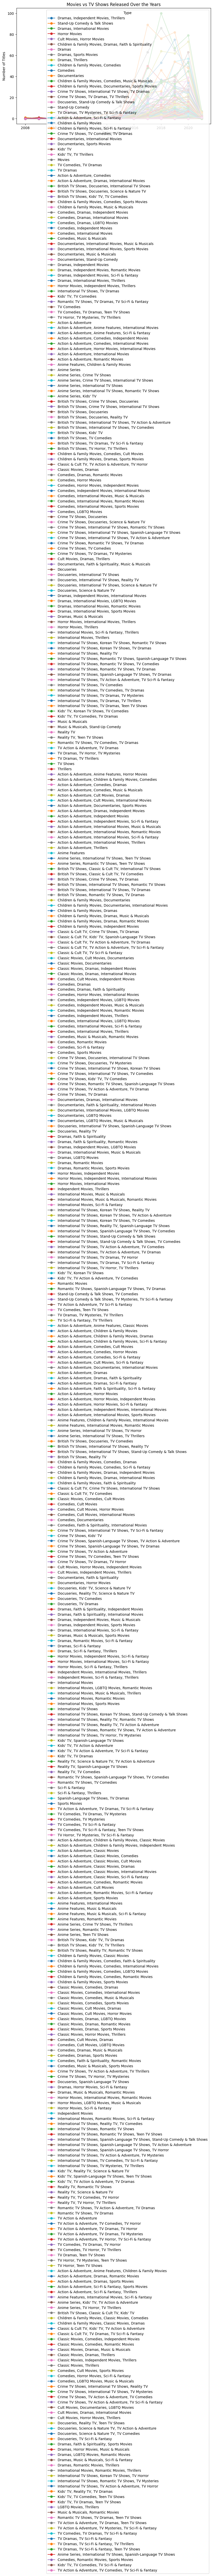

In [ ]:
import matplotlib.pyplot as plt

# Extract Release Year from Release_Date
df['Release_Year'] = df['Release_Date'].dt.year

# Group by Release Year and Content Type, count the shows
release_trend = df.groupby(['Release_Year', 'Type']).size().unstack(fill_value=0)

# Plot the trend
release_trend.plot(kind='line', figsize=(10,6), marker='o')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.title('Movies vs TV Shows Released Over the Years')
plt.legend(title='Type')
plt.show()


Show only recent years (e.g., after 2000)

Top 10 DIRECTORS by Number of TItles on NETFLIX


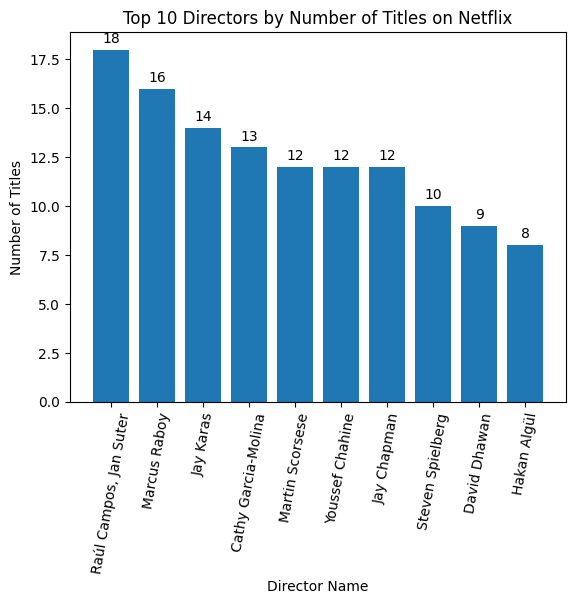

In [ ]:
# Top 10 directors with the most titles on Netflix
directors = df['Director'].value_counts().nlargest(10).to_frame(name='Title Count')

directors_bar = plt.bar(directors.index, directors['Title Count'])
plt.bar_label(directors_bar, labels=directors['Title Count'], label_type='edge', padding=3)
plt.xlabel('Director Name')
plt.ylabel('Number of Titles')
plt.xticks(rotation=80)
plt.title("Top 10 Directors by Number of Titles on Netflix")
plt.show()


Top 10 ACTORS

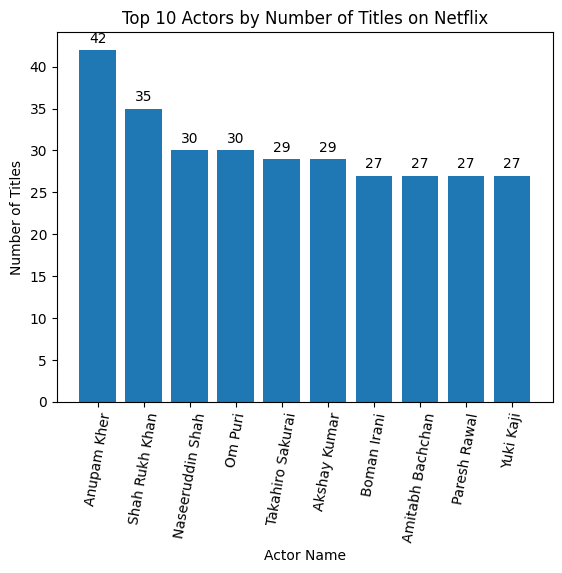

In [ ]:
# Since 'Cast' has multiple names, we split and count individually
from collections import Counter

# Drop NaN and split actors
actor_list = df['Cast'].dropna().str.split(', ')
actor_counts = Counter([actor for sublist in actor_list for actor in sublist])

# Top 10 actors
top_actors = pd.DataFrame(actor_counts.most_common(10), columns=['Actor', 'Title Count'])

actors_bar = plt.bar(top_actors['Actor'], top_actors['Title Count'])
plt.bar_label(actors_bar, labels=top_actors['Title Count'], label_type='edge', padding=3)
plt.xlabel('Actor Name')
plt.ylabel('Number of Titles')
plt.xticks(rotation=80)
plt.title("Top 10 Actors by Number of Titles on Netflix")
plt.show()


Do Movies or TV Shows tend to have higher maturity ratings?

In [ ]:
review = df.groupby('Category')['Rating'].value_counts(normalize=True).unstack().fillna(0)
review


Rating           G     NC-17        NR        PG     PG-13         R  \
Category                                                               
Movie     0.007257  0.000558  0.014700  0.045962  0.071827  0.123372   
TV Show   0.000000  0.000000  0.002076  0.000000  0.000000  0.000831   

Rating       TV-14      TV-G     TV-MA     TV-PG      TV-Y     TV-Y7  \
Category                                                               
Movie     0.236695  0.020655  0.343692  0.093971  0.021771  0.017678   
TV Show   0.273671  0.034468  0.422757  0.125000  0.067691  0.073090   

Rating    TV-Y7-FV       UR  
Category                     
Movie     0.000930  0.00093  
TV Show   0.000415  0.00000

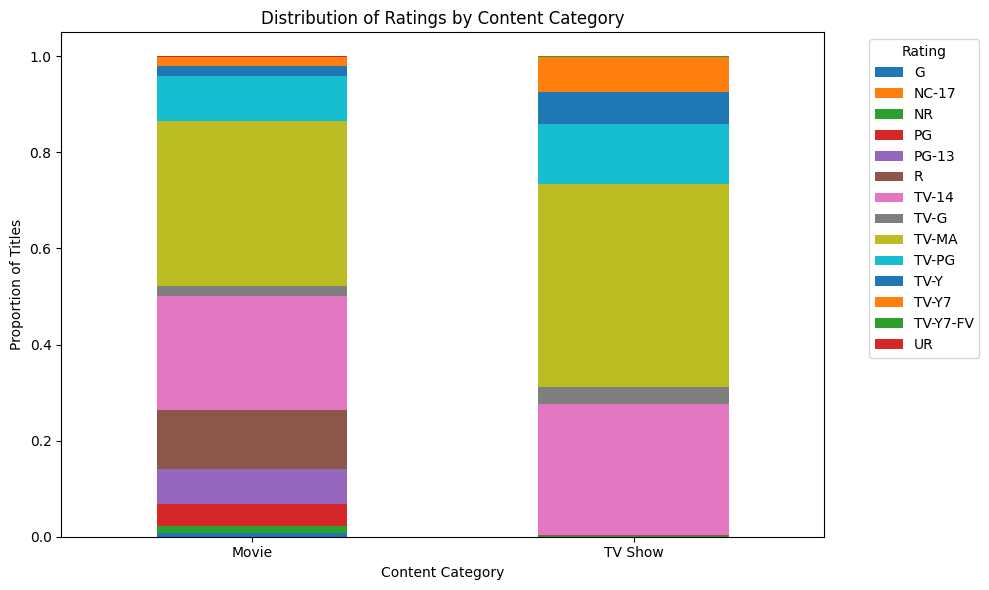

In [ ]:
import matplotlib.pyplot as plt

# Use the 'review' DataFrame from the previous cell
review.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Content Category')
plt.ylabel('Proportion of Titles')
plt.title('Distribution of Ratings by Content Category')
plt.xticks(rotation=0)
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

The Average Rating by Content Type on Netflix

Movies vs TV Shows Over the Years

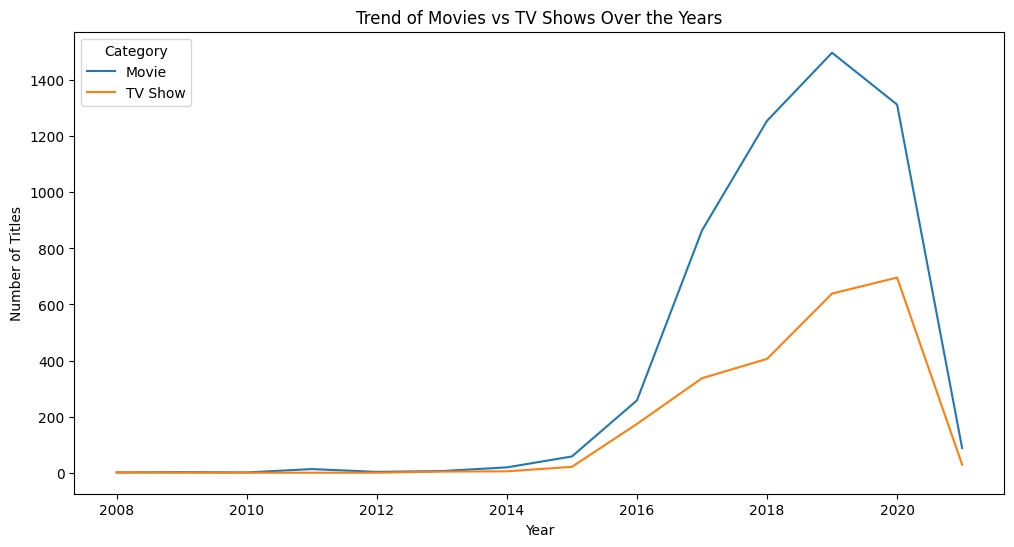

In [ ]:
# Extract year from 'Release_Date' if not already in a column
df['release_year'] = pd.to_datetime(df['Release_Date'], errors='coerce').dt.year

# Count of Movies and TV Shows per year
type_trend = df.groupby(['release_year', 'Category']).size().unstack().fillna(0)

# Line plot
type_trend.plot(kind='line', figsize=(12,6))
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.title('Trend of Movies vs TV Shows Over the Years')
plt.show()

Genre Popularity

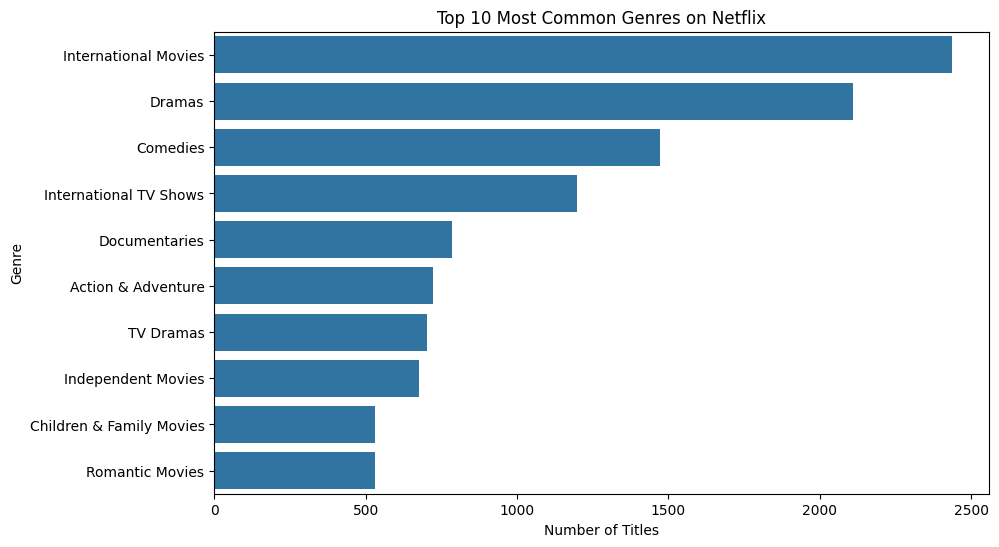

In [ ]:
# Split genres if multiple per entry
df['genre_list'] = df['Type'].str.split(', ')

# Explode so each genre gets its own row
genre_df = df.explode('genre_list')

# Count of each genre
genre_count = genre_df['genre_list'].value_counts().head(10)  # Top 10 genres

# Bar plot of top genres
plt.figure(figsize=(10,6))
sns.barplot(x=genre_count.values, y=genre_count.index)
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.title('Top 10 Most Common Genres on Netflix')
plt.show()

Genre Trends Over Time

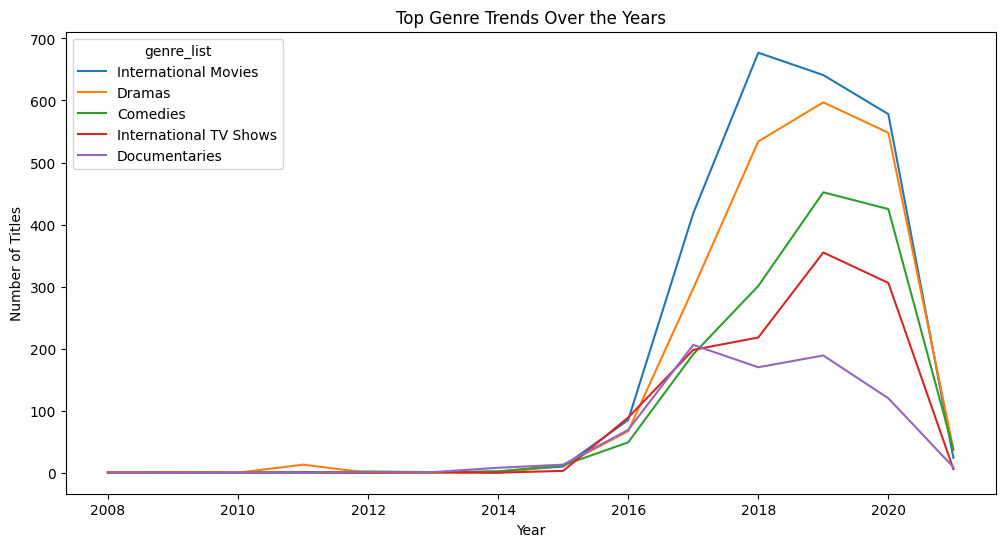

In [ ]:
# Count titles per genre per year
genre_year = genre_df.groupby(['release_year', 'genre_list']).size().unstack().fillna(0)

# Plot top genres over time
top_genres = genre_count.index[:5]  # Focus on top 5 genres
genre_year[top_genres].plot(figsize=(12,6))
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.title('Top Genre Trends Over the Years')
plt.show()


Country-Wise Contribution

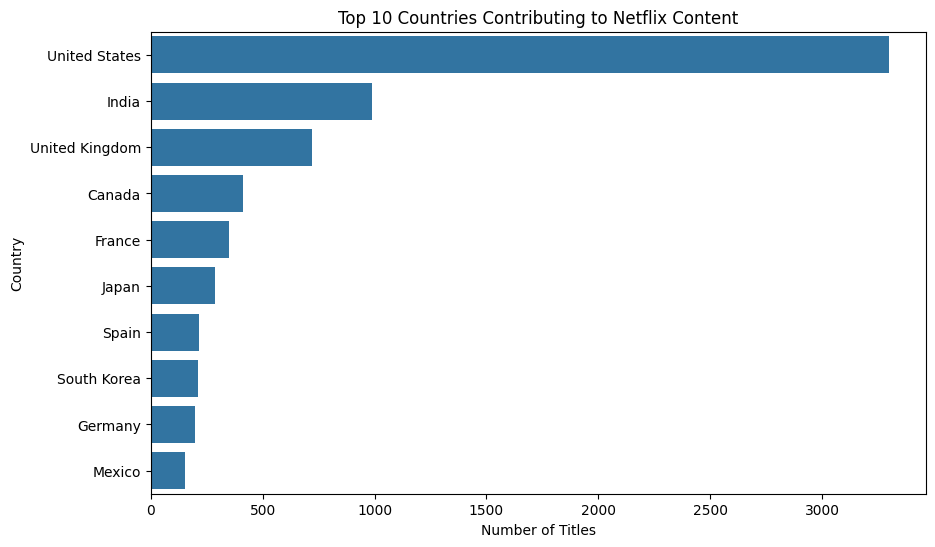

In [ ]:
# Split countries if multiple per entry
df['country_list'] = df['Country'].str.split(', ')
country_df = df.explode('country_list')

# Count titles per country
country_count = country_df['country_list'].value_counts().head(10)

# Horizontal bar plot
plt.figure(figsize=(10,6))
sns.barplot(x=country_count.values, y=country_count.index)
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.title('Top 10 Countries Contributing to Netflix Content')
plt.show()

Ratings Distribution

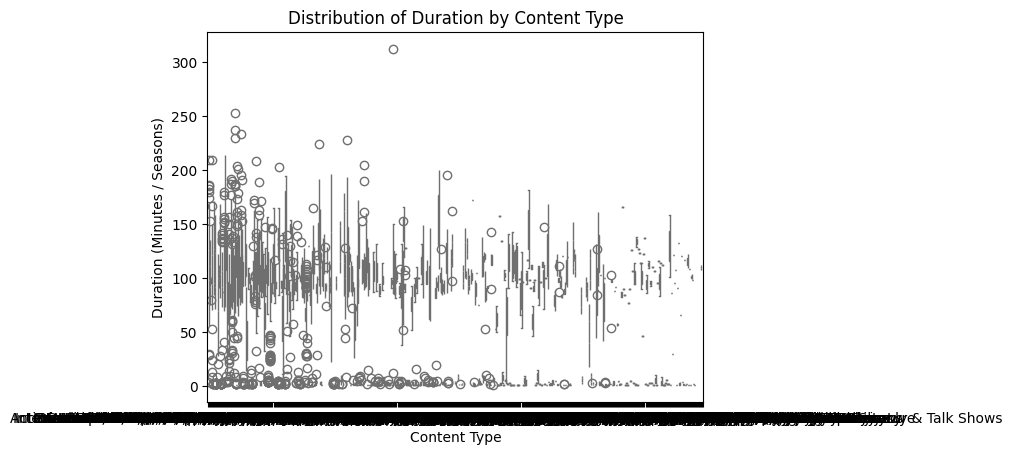

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract numeric duration
df['duration_num'] = df['Duration'].str.extract(r'(\d+)').astype(float)

# Drop missing values
df_clean = df.dropna(subset=['Type', 'duration_num'])

# Boxplot
sns.boxplot(data=df_clean, x='Type', y='duration_num', color='skyblue')
plt.title('Distribution of Duration by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Duration (Minutes / Seasons)')
plt.show()


Duration Analysis

Objective: Compare typical durations between Movies and TV Shows.

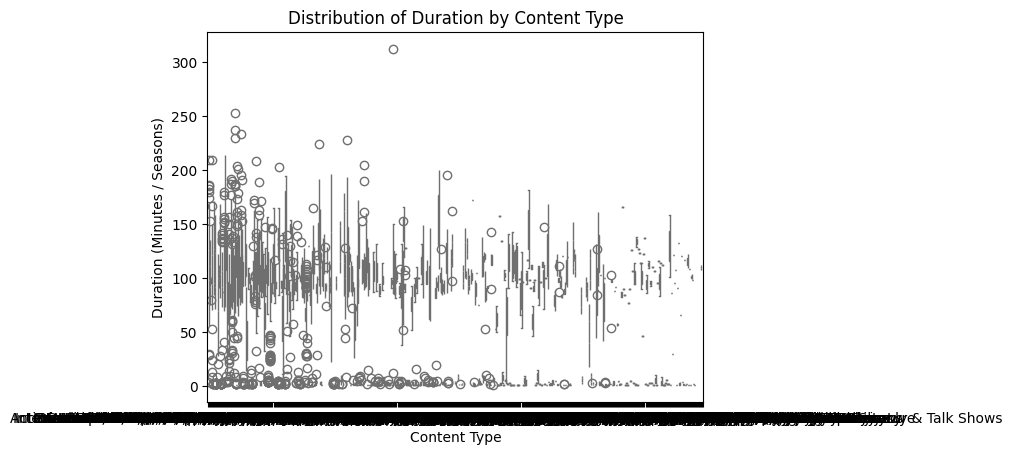

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract numeric duration from 'Duration' column (capital D)
df['duration_num'] = df['Duration'].str.extract(r'(\d+)').astype(float)

# Drop rows with missing values
df_clean = df.dropna(subset=['Type', 'duration_num'])

# Boxplot
sns.boxplot(data=df_clean, x='Type', y='duration_num', color='skyblue')
plt.title('Distribution of Duration by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Duration (Minutes / Seasons)')
plt.show()


Heatmap for Genre-Country Analysis

Objective: Find which genres are most produced in which countries.

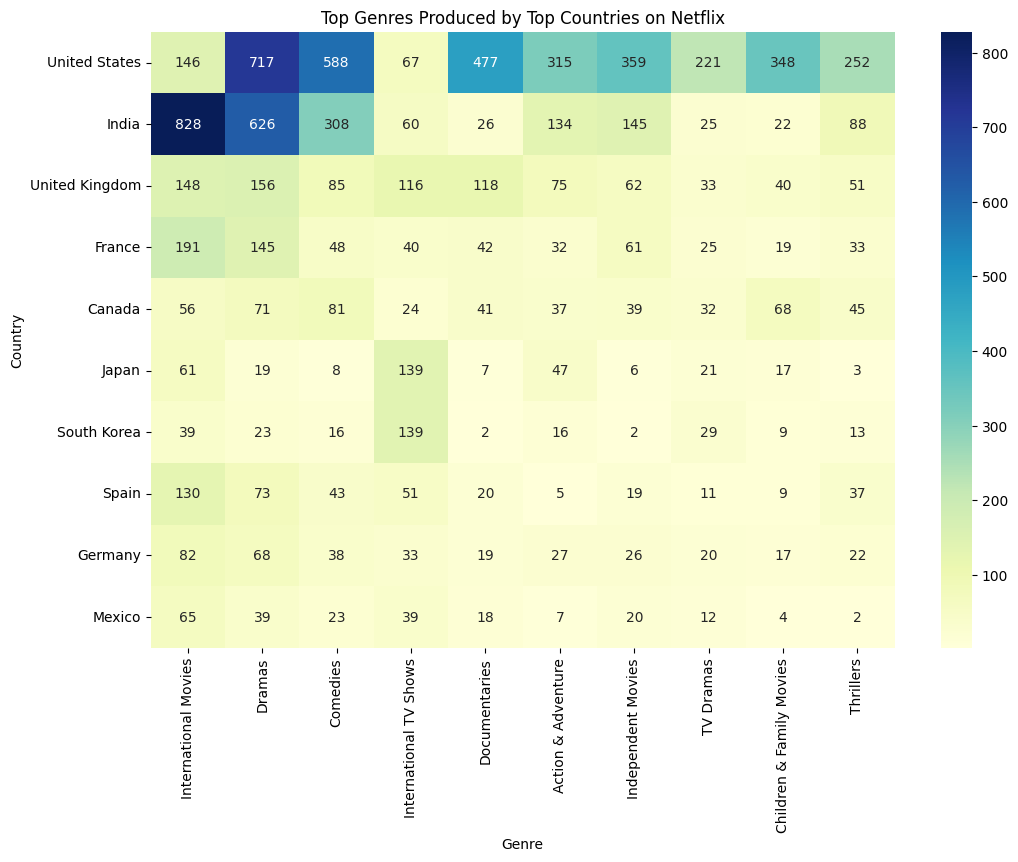

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure genre_list and country_list are exploded (one entry per row)
df_genre_country = df.explode('genre_list').explode('country_list')

# Group by country and genre, count number of titles
genre_country_counts = df_genre_country.groupby(['country_list', 'genre_list']).size().unstack(fill_value=0)

# Select top 10 countries and top 10 genres for clarity
top_countries = df_genre_country['country_list'].value_counts().head(10).index
top_genres = df_genre_country['genre_list'].value_counts().head(10).index

# Subset the data
heatmap_data = genre_country_counts.loc[top_countries, top_genres]

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='YlGnBu')
plt.title('Top Genres Produced by Top Countries on Netflix')
plt.xlabel('Genre')
plt.ylabel('Country')
plt.show()


Conclusion

The analysis of the Netflix dataset provides a comprehensive view of the platform’s content trends and strategic insights. By examining Movies vs TV Shows, genre popularity, country-wise contributions, and other content characteristics, several key findings emerge:

Content Type Distribution:

Movies and TV Shows show varying trends over the years, highlighting Netflix’s evolving content strategy.

Analysis of average ratings and maturity levels reveals differences in audience reception between Movies and TV Shows.

Genre Analysis:

Certain genres consistently dominate the catalog, while others show emerging popularity trends over time.

The heatmap analysis of genres by country illustrates which types of content are prioritized in different regions, providing insight into Netflix’s international strategy.

Country-wise Contributions:

Top contributing countries have a strong influence on content diversity.

Insights into underrepresented countries can inform future content acquisition strategies.

Audience and Content Characteristics:

Analysis of ratings, duration, and key creators (directors and actors) adds further depth, highlighting content quality and target audience preferences.

Strategic Insights:

The combination of all analyses aligns with the project objectives of understanding Netflix’s content strategy evolution.

Recommendations can be made for content expansion, focusing on underrepresented genres, countries, or content types to maximize audience engagement and global reach.